Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  202

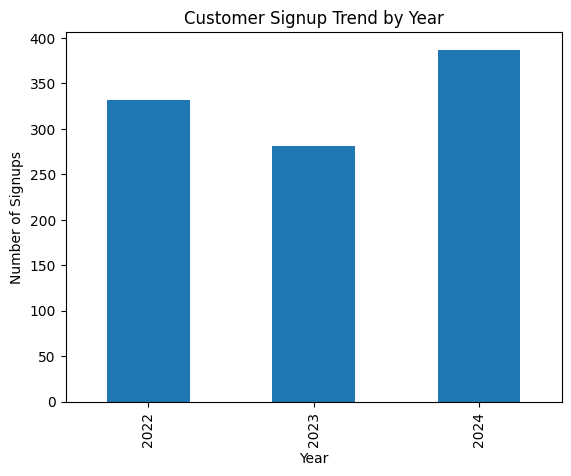

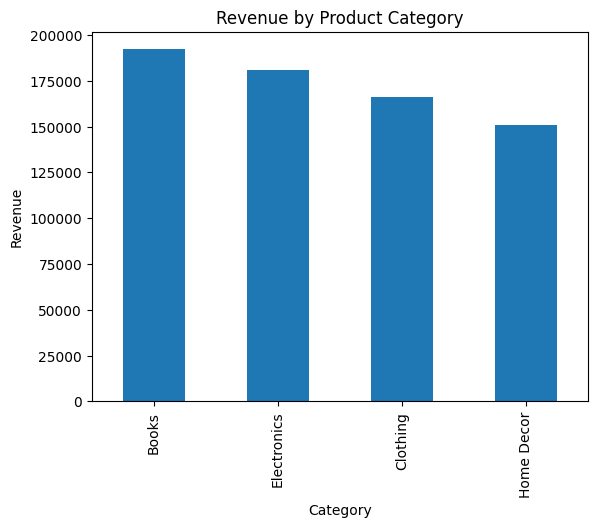

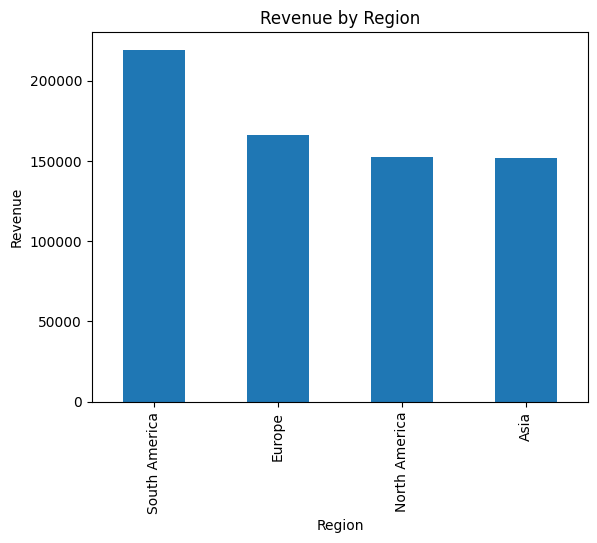

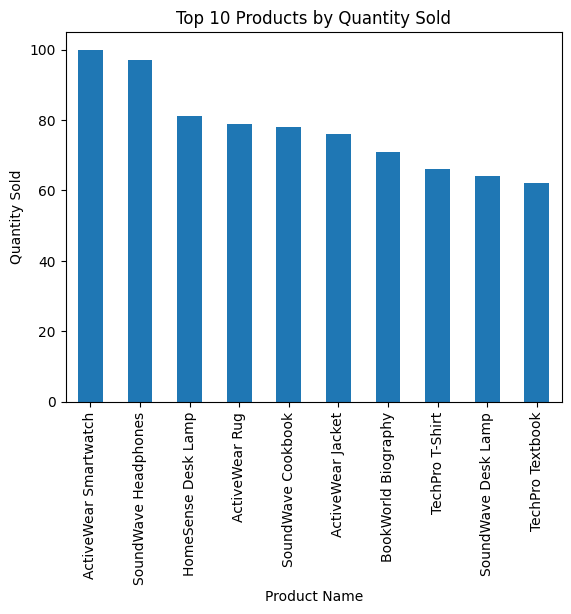

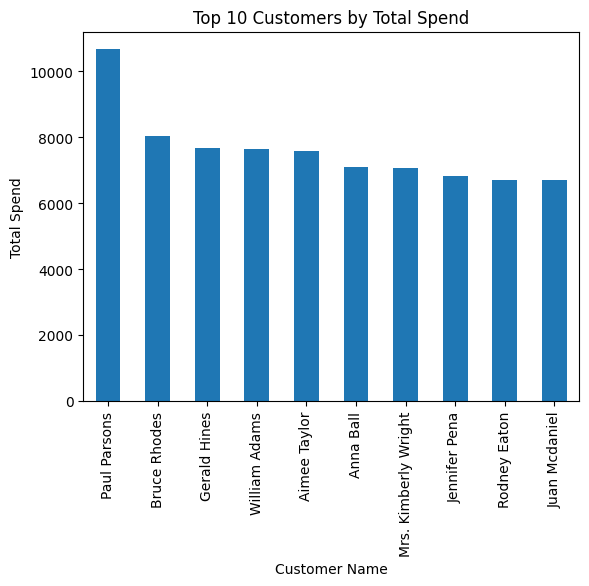

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


print("Customers:\n", customers.head())
print("Products:\n", products.head())
print("Transactions:\n", transactions.head())


transactions = transactions.merge(customers, on="CustomerID", how="left")
transactions = transactions.merge(products, on="ProductID", how="left")


print("\nMerged Dataset Info:\n")
print(transactions.info())


print("\nMissing Values:\n")
print(transactions.isnull().sum())

print("\nDescriptive Statistics:\n")
print(transactions.describe())


transactions["SignupYear"] = pd.to_datetime(transactions["SignupDate"]).dt.year
signup_trend = transactions["SignupYear"].value_counts().sort_index()
signup_trend.plot(kind="bar", title="Customer Signup Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


category_revenue = transactions.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar", title="Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

region_revenue = transactions.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
region_revenue.plot(kind="bar", title="Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()


top_products = transactions.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", title="Top 10 Products by Quantity Sold")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.show()


high_value_customers = transactions.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
high_value_customers.plot(kind="bar", title="Top 10 Customers by Total Spend")
plt.xlabel("Customer Name")
plt.ylabel("Total Spend")
plt.show()


transactions.to_csv("Processed_Transactions.csv", index=False)
